In [1]:
import numpy as np

In [2]:
mat = np.random.randint(0, 10, size=(6, 6))

In [3]:
mat

array([[3, 2, 3, 8, 1, 4],
       [0, 1, 7, 7, 6, 6],
       [7, 3, 2, 1, 0, 3],
       [4, 3, 1, 8, 7, 5],
       [1, 9, 2, 3, 3, 2],
       [2, 1, 4, 4, 5, 9]])

In [4]:
filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

In [5]:
filter.shape

(3, 3)

In [6]:
lines = mat.shape[0] - filter.shape[0] + 1
cols = mat.shape[1] - filter.shape[1] + 1
new_mat = np.zeros((lines, cols))
for a in range(lines):
    for b in range(cols):
        prod = mat[a:a + filter.shape[0], b:b + filter.shape[1]] * filter
        #print(mat[a:a + filter.shape[0], b:b + filter.shape[1]])
        new_mat[a, b] = np.sum(prod)
        #print(np.sum(prod))

In [7]:
new_mat

array([[ -9., -16.,   6.,   4.],
       [  6.,  -7.,  -1.,   0.],
       [ 10.,  -2., -11.,   5.],
       [ -1.,   4.,  -9.,   0.]])

In [8]:
def ConvMat(mat, filter, stride=1):
    lines = int((mat.shape[0] - filter.shape[0])/stride) + 1
    cols = int((mat.shape[1] - filter.shape[1])/stride) + 1
    new_mat = np.zeros((lines, cols))
    for a in range(lines):
        for b in range(cols):
            prod = mat[a:a + filter.shape[0], b:b + filter.shape[1]] * filter
            #print(mat[a:a + filter.shape[0], b:b + filter.shape[1]])
            new_mat[a, b] = np.sum(prod)
            #print(np.sum(prod))

    return new_mat

In [9]:
new_mat = ConvMat(mat, filter, stride=2)

In [10]:
new_mat

array([[ -9., -16.],
       [  6.,  -7.]])

In [11]:
import matplotlib.pyplot as plt 

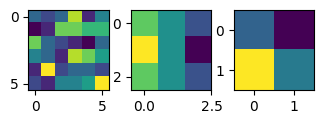

In [12]:
plt.figure()
plt.subplot(4, 5, 1)
plt.imshow(mat)
plt.subplot(4, 5, 2)
plt.imshow(filter)
plt.subplot(4, 5, 3)
plt.imshow(new_mat)
plt.show()

In [309]:
def ConvMat2(mat, filter):
    lines = mat.shape[0] - filter.shape[0] + 1
    cols = mat.shape[1] - filter.shape[1] + 1
    depth = filter.shape[2]
    new_mat = np.zeros((lines, cols, depth))
    for z in range(depth):
        for a in range(lines):
            for b in range(cols):
                prod = mat[a:a + filter.shape[1], b:b + filter.shape[2], z] * filter[[[z]]]
                new_mat[a, b, z] = np.sum(prod)
    
    return new_mat

def ConvImage(mat, filters):
    lines = mat.shape[0] - filter.shape[0] + 1
    cols = mat.shape[1] - filter.shape[1] + 1
    depth = len(filters)
    new_mat = np.zeros((lines, cols, depth))
    for z in range(depth):
        for a in range(lines):
            for b in range(cols):
                prod = mat[a:a + filter.shape[1], b:b + filter.shape[2], z] * filters[z]
                new_mat[a, b, z] = np.sum(prod)
    
    return new_mat



In [247]:
from PIL import Image

In [248]:
img = Image.open('Hibiscus.png')
img = np.array(img)
img_show = Image.fromarray(img)

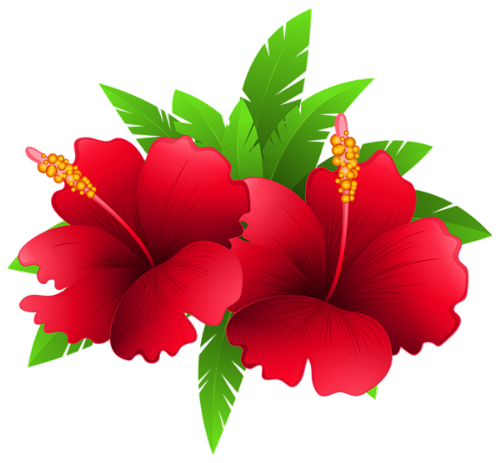

In [249]:
img_show

In [250]:
img.shape

(463, 500, 4)

In [320]:
filter = np.array([[[1, 0, -1]]*3]*3)
print(filter)
filters = np.array([filter])

[[[ 1  0 -1]
  [ 1  0 -1]
  [ 1  0 -1]]

 [[ 1  0 -1]
  [ 1  0 -1]
  [ 1  0 -1]]

 [[ 1  0 -1]
  [ 1  0 -1]
  [ 1  0 -1]]]


In [252]:
img

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [325]:
np.array(ConvImage(img, filters)).astype(np.uint8).shape

(461, 498, 1)

In [324]:
Image.fromarray(np.array(ConvImage(img, filters)).astype(np.uint8))

TypeError: Cannot handle this data type: (1, 1, 1), |u1

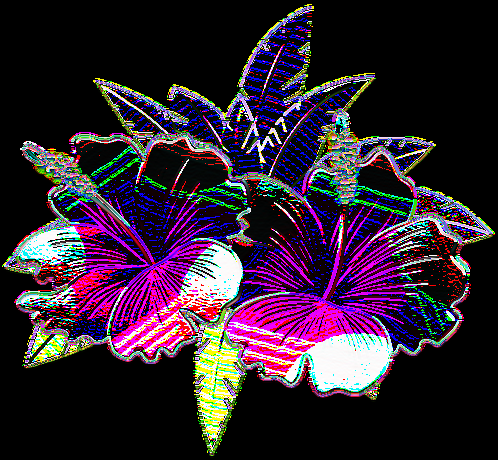

In [323]:
filter_horiz = np.array([[[1, 1, 1], 
                    [0, 0, 0], 
                    [-1, -1, -1]]]*4)
Image.fromarray(np.array(ConvMat2(img, filter_horiz)).astype(np.uint8))

In [160]:
arr = np.array([[1, 2, 7, 4, 6, 2, 0],
        [3, 6, 8, 8, 7, 4, 9],
        [4, 3, 6, 3, 8, 9, 8],
        [8, 4, 3, 6, 6, 3, 0],
        [6, 8, 1, 0, 8, 3, 4],
        [7, 2, 4, 2, 1, 9, 8],
        [5, 2, 3, 4, 9, 3, 1]])

In [161]:
filt = np.array([[1, 0, -1]]* 3)

In [162]:
filt

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [163]:
ConvMat(arr, filt, stride=2)

array([[-13.,  -4.,   0.],
       [ -2.,  -4.,  -4.],
       [  8.,   6., -12.]])

In [164]:
ConvMat(arr, filt, stride=3)

array([[-13.,  -4.],
       [ -2.,  -4.]])

In [176]:
arr_3d = np.array([[[1, 2, 7, 4, 6, 2, 0],
        [3, 6, 8, 8, 7, 4, 9],
        [4, 3, 6, 3, 8, 9, 8],
        [8, 4, 3, 6, 6, 3, 0],
        [6, 8, 1, 0, 8, 3, 4],
        [7, 2, 4, 2, 1, 9, 8],
        [5, 2, 3, 4, 9, 3, 1]]]*3)
arr_3d = arr_3d.reshape((7, 7, 3))
arr_3d.shape

(7, 7, 3)

In [285]:
filter_vert = np.array([[1, 0, -1], 
                        [1, 0, -1], 
                        [1, 0, -1]])
filter_horiz = np.array([[1, 1, 1], 
                        [0, 0, 0], 
                        [-1, -1, -1]])
both = np.array([filter_vert, filter_horiz])
len(both)

2

In [286]:
mat = ConvMat2(arr_3d, both)

In [188]:
horz_mat = ConvMat2(arr_3d, filter_horiz)

In [287]:
print(mat.shape)

(4, 5, 2)


TypeError: Invalid shape (4, 5, 2) for image data

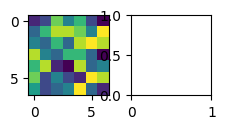

In [288]:
plt.figure()
plt.subplot(4, 5, 1)
plt.imshow(arr)
plt.subplot(4, 5, 2)
plt.imshow(mat)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


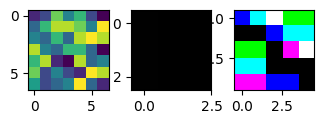

In [191]:
plt.figure()
plt.subplot(4, 5, 1)
plt.imshow(arr)
plt.subplot(4, 5, 2)
plt.imshow(filter_horiz)
plt.subplot(4, 5, 3)
plt.imshow(horz_mat)
plt.show()